<a href="https://colab.research.google.com/github/prad69/MLProjects/blob/main/Forecasting_Volcanic_Eruption_and_Impact_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


* Forecasting Volcanic Eruption and Impact Assessment




# 1.Install packages and Imports

Install packages

In [ ]:
#!pip install tsfresh
#!pip install lazypredict
!pip install pycaret
!pip install mlflow
#!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.7 MB/s e

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00


**Import libraries**

In [ ]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve
import re
import glob
import os
from sklearn.model_selection import GroupKFold
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin
#import lazypredict
#from lazypredict.Supervised import LazyClassifier
#from lazypredict.Supervised import LazyRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# 2.Util Functions


In [ ]:
#function to split the array into list of arrays of specific size using a sliding window
def sliding_window(arr, window_size):
    result = []
    for i in range(len(arr) - window_size + 1):
        window = arr[i:i + window_size]
        result.append(window)
    return result

#function to return all the label names
def getColumns():
    readings_cols = []
    for i in range(1, 51):
        readings_cols.append(f'Reading-{i}')
    columns = ['VolcanoID','obsID','v', 'Patm', 'g' ,'r','G','rho' ,'mu' , 'rc','M','sigma','tilt_erupt','Eruption','timetoErupt']
    columns = columns + readings_cols
    return columns

#convert string to float for scientific notation values
def conv_float(x) :
  base, exponent = map(float, x.split('^'))
  result = base ** exponent
  return result


def getObservationID(y):
    patterne = re.compile(r'observation(\d+)')
    matchess = patterne.findall(y)
    labe =''
    for match in matchess :
      labe = f'o{match}'
    return labe

def getVolcanoID(y):
    pattern1 = re.compile(r'Volcano(\d+)')
    matches1 = pattern1.findall(y)
    lab=''
    for match in matches1:
        lab = f'v{match}'
    return lab

#Function to return sensor reading label names
def getReadingslabels() :
 lab3 =[]
 for i in range(1,51):
  lab3.append("Reading-"+str(i))
 return lab3

# 3.Data Preparation

1. Load the files from file location
2. Read the lines and create dataframe by splitting data
3. Create a sliding window from the readings to add multiple rows for readings
4. Identify the Eruption Event 'Y' or 'N'

After splitting the Readings into multiple rows the last row of the observation points to the Eruption mapgnitude . In this case , we have readings from 1- 50 based on the sliding window , so 'Reading-50' is the value which has the tiltErupt value.

## Load files and Split the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


def readData():
    folder_path = '/content/drive/MyDrive/Colab Notebooks/datasets/Volcano_Dataset'

    #folder-path for testing with a smaller subset of total data
    #folder_path = '/content/drive/MyDrive/Colab Notebooks/datasets/test'.

    text_files = glob.glob(os.path.join(folder_path, '**/*.txt'), recursive=True)
    print(f"Number of files loaded {len(text_files)}")

    #Regex patterns
    pattern_timeunits = r'^-?\d+(,-?\d+)*$' #
    pattern_readings = r'^-?\d+\.\d+e[+-]\d+(,-?\d+\.\d+e[+-]\d+)*$'
    pattern_essential = re.compile(r'^([^,]+),([^,]+)$')

    df_list =[]
    final_list =[]

    time_unit_window_size = 50

    for index, file_name in enumerate(text_files, start=1):

        with open(file_name, 'r') as file:
            data =  file.readlines()

        obs_vals =[]
        readings = []

        obs_vals = [getVolcanoID(file_name)]
        obs_vals.append(getObservationID(file_name))

        for line in data:
            if re.match(pattern_readings, line):
                values = line.strip().split(',')
                readings = values[0:]
            elif re.match(pattern_essential, line):
                values = line.strip().split(',')
                obs_vals = obs_vals+values[1:]

        window_val = sliding_window(readings ,time_unit_window_size)

        time_unit_length = len(readings)

        final_res =[]
        for index,elem in enumerate(window_val) :
            eruption ='N'
            if index == len(elem)-1 :
              eruption ='Y'  # Only the last reading is the Eruption event

            timeunit= time_unit_length -50 -index
            res =  obs_vals+[eruption]+[timeunit]+elem
            final_res.append(res)

        df_list.append( pd.DataFrame(final_res))

        file.close()

    df= pd.concat(df_list)
    df.columns = getColumns()

    return df


Mounted at /content/drive


In [ ]:
df = readData()
df.head()

Number of files loaded 189


,VolcanoID,obsID,v,Patm,g,r,G,rho,mu,rc,M,sigma,tilt_erupt,Eruption,timetoErupt,Reading-1,Reading-2,Reading-3,Reading-4,Reading-5,Reading-6,Reading-7,Reading-8,Reading-9,Reading-10,Reading-11,Reading-12,Reading-13,Reading-14,Reading-15,Reading-16,Reading-17,Reading-18,Reading-19,Reading-20,Reading-21,Reading-22,Reading-23,Reading-24,Reading-25,Reading-26,Reading-27,Reading-28,Reading-29,Reading-30,Reading-31,Reading-32,Reading-33,Reading-34,Reading-35,Reading-36,Reading-37,Reading-38,Reading-39,Reading-40,Reading-41,Reading-42,Reading-43,Reading-44,Reading-45,Reading-46,Reading-47,Reading-48,Reading-49,Reading-50
0,v10,o1,0.25,100000,9.81,500,10^10.77,2700,10^2.17,23,10^5.15,0.1,2.535nrad,N,1138,-8.24828157899596e-11,-1.38873103857189e-10,1.81643834689477e-10,1.61248624070792e-10,5.00880306150708e-11,-5.29904781458661e-11,2.53814200677975e-13,1.80708755554476e-11,2.86597883770224e-11,-1.65820186599391e-10,-2.80485167834648e-11,4.99641836794803e-11,-9.45538552320437e-11,6.33838990941032e-11,-4.13635684137958e-11,-5.68164455398144e-11,-1.66896892478417e-10,-2.44792143954873e-12,-7.94771941940617e-11,-7.72747769382642e-11,8.39369526063571e-11,-1.88030944147758e-11,-5.33554010228803e-12,-8.10330971541115e-11,-9.85570124140416e-11,4.51267695253266e-11,-9.46276142462119e-12,7.54892519587139e-11,1.47362307625875e-10,-1.86632604797127e-10,-1.12918934535707e-11,7.05620815989224e-11,3.94778929926985e-11,3.64675350465367e-11,-3.19691743507404e-11,1.13245437008217e-11,6.30598807180892e-11,1.1822424323445e-11,5.03263311024438e-11,-1.43663529485704e-10,-1.48125112984438e-11,8.32948562032265e-12,-1.37566680167994e-10,-2.84625449401584e-11,-1.31681008831675e-11,-8.68124717855312e-11,1.78661629313958e-10,-1.3473841070089e-10,1.01131618626262e-10,1.45626466990353e-10
1,v10,o1,0.25,100000,9.81,500,10^10.77,2700,10^2.17,23,10^5.15,0.1,2.535nrad,N,1137,-1.38873103857189e-10,1.81643834689477e-10,1.61248624070792e-10,5.00880306150708e-11,-5.29904781458661e-11,2.53814200677975e-13,1.80708755554476e-11,2.86597883770224e-11,-1.65820186599391e-10,-2.80485167834648e-11,4.99641836794803e-11,-9.45538552320437e-11,6.33838990941032e-11,-4.13635684137958e-11,-5.68164455398144e-11,-1.66896892478417e-10,-2.44792143954873e-12,-7.94771941940617e-11,-7.72747769382642e-11,8.39369526063571e-11,-1.88030944147758e-11,-5.33554010228803e-12,-8.10330971541115e-11,-9.85570124140416e-11,4.51267695253266e-11,-9.46276142462119e-12,7.54892519587139e-11,1.47362307625875e-10,-1.86632604797127e-10,-1.12918934535707e-11,7.05620815989224e-11,3.94778929926985e-11,3.64675350465367e-11,-3.19691743507404e-11,1.13245437008217e-11,6.30598807180892e-11,1.1822424323445e-11,5.03263311024438e-11,-1.43663529485704e-10,-1.48125112984438e-11,8.32948562032265e-12,-1.37566680167994e-10,-2.84625449401584e-11,-1.31681008831675e-11,-8.68124717855312e-11,1.78661629313958e-10,-1.3473841070089e-10,1.01131618626262e-10,1.45626466990353e-10,-8.25343621536494e-11
2,v10,o1,0.25,100000,9.81,500,10^10.77,2700,10^2.17,23,10^5.15,0.1,2.535nrad,N,1136,1.81643834689477e-10,1.61248624070792e-10,5.00880306150708e-11,-5.29904781458661e-11,2.53814200677975e-13,1.80708755554476e-11,2.86597883770224e-11,-1.65820186599391e-10,-2.80485167834648e-11,4.99641836794803e-11,-9.45538552320437e-11,6.33838990941032e-11,-4.13635684137958e-11,-5.68164455398144e-11,-1.66896892478417e-10,-2.44792143954873e-12,-7.94771941940617e-11,-7.72747769382642e-11,8.39369526063571e-11,-1.88030944147758e-11,-5.33554010228803e-12,-8.10330971541115e-11,-9.85570124140416e-11,4.51267695253266e-11,-9.46276142462119e-12,7.54892519587139e-11,1.47362307625875e-10,-1.86632604797127e-10,-1.12918934535707e-11,7.05620815989224e-11,3.94778929926985e-11,3.64675350465367e-11,-3.19691743507404e-11,1.13245437008217e-11,6.30598807180892e-11,1.1822424323445e-11,5.03263311024438e-11,-1.43663529485704e-10,-1.48125112984438e-11,8.32948562032265e-12,-1.37566680167994e-10,-2.84625449401584e-11,-1.31681008831675e-11,-8.68124717855312e-11,1.78661629313958e-10,-1.347384

## Convert from Scientific Notation  to Float


In [ ]:

#convert Sceintific notion String to Float values
df['G'] = df['G'].apply(lambda x: conv_float(x))
df['mu'] = df['mu'].apply(lambda x: conv_float(x))
df['M'] = df['M'].apply(lambda x: conv_float(x))


## Convert other columns to Numeric

In [ ]:
columns = getColumns()
columns.remove('VolcanoID')
columns.remove('obsID')
columns.remove('Eruption')
columns.remove('v')
columns.remove('Patm')
columns.remove('g')
columns.remove('r')
columns.remove('tilt_erupt')

df[columns]=df[columns].apply(pd.to_numeric)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233566 entries, 0 to 1357
Data columns (total 65 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   VolcanoID    233566 non-null  object 
 1   obsID        233566 non-null  object 
 2   v            233566 non-null  object 
 3   Patm         233566 non-null  object 
 4   g            233566 non-null  object 
 5   r            233566 non-null  object 
 6   G            233566 non-null  float64
 7   rho          233566 non-null  int64  
 8   mu           233566 non-null  float64
 9   rc           233566 non-null  int64  
 10  M            233566 non-null  float64
 11  sigma        233566 non-null  float64
 12  tilt_erupt   233566 non-null  object 
 13  Eruption     233566 non-null  object 
 14  timetoErupt  233566 non-null  int64  
 15  Reading-1    233566 non-null  float64
 16  Reading-2    233566 non-null  float64
 17  Reading-3    233566 non-null  float64
 18  Reading-4    233566 non-nu

Drop the tilt Erupt value and Constant value columns

In [ ]:
# Drop the tilt Erupt value column
tilt_erupt_cols = ['tilt_erupt']
df.drop(columns=tilt_erupt_cols, inplace=True)


#drop the Columns v.Patm,g,r as the data is the same in all rows
#in the dataset as they have zero variance, and their removal doesn't affect the model's performance.
const_cols = ['v','Patm','g','r']
df = df.drop(columns=const_cols)

## Augment Data and add additional columns

Add additional columns like Mean , Max, Median , RateOfChange, Standard Deviation ,Quantile etc.

I have tried using **TSFresh** library which returns return multiple other columns based on the timeseries data. Ignoring for now to keep the model simple.

In [ ]:
from scipy.signal import find_peaks
def find_peaks_in_row(row):
    peaks, _ = find_peaks(row)
    return len(peaks)

reading_cols =[]
for i in range(1,51):
  reading_cols.append('Reading-'+str(i))


def calculate_quantiles(row):
    return row.quantile([0.25, 0.5, 0.75])


df['Mean'] = df[reading_cols].mean(axis=1)
df['Median'] = df[reading_cols].median(axis=1)
df['Max'] = df[reading_cols].max(axis=1)
df['Min'] = df[reading_cols].min(axis=1)
df['rateOfChange'] = ((df['Reading-50']-df['Reading-1'])/df['Reading-50'])*100
df['stdDeviation'] = df[reading_cols].std(axis=1)
df['var'] = df[reading_cols].var(axis=1)
df['quantile'] = df[reading_cols].quantile(axis=1)
df['peaks'] = df[reading_cols].apply(find_peaks_in_row, axis=1)
#df[['Q1', 'Q2', 'Q3']] = df[reading_cols].apply(calculate_quantiles, axis=1)
df['Sum']= df[reading_cols].sum(axis=1)


In [ ]:
df.head()

,VolcanoID,obsID,G,rho,mu,rc,M,sigma,Eruption,timetoErupt,Reading-1,Reading-2,Reading-3,Reading-4,Reading-5,Reading-6,Reading-7,Reading-8,Reading-9,Reading-10,Reading-11,Reading-12,Reading-13,Reading-14,Reading-15,Reading-16,Reading-17,Reading-18,Reading-19,Reading-20,Reading-21,Reading-22,Reading-23,Reading-24,Reading-25,Reading-26,Reading-27,Reading-28,Reading-29,Reading-30,Reading-31,Reading-32,Reading-33,Reading-34,Reading-35,Reading-36,Reading-37,Reading-38,Reading-39,Reading-40,Reading-41,Reading-42,Reading-43,Reading-44,Reading-45,Reading-46,Reading-47,Reading-48,Reading-49,Reading-50,Mean,Median,Max,Min,rateOfChange,stdDeviation,var,quantile,peaks,Sum
0,v10,o1,5.888437e+10,2700,147.910839,23,141253.754462,0.1,N,1138,-8.248282e-11,-1.388731e-10,1.816438e-10,1.612486e-10,5.008803e-11,-5.299048e-11,2.538142e-13,1.807088e-11,2.865979e-11,-1.658202e-10,-2.804852e-11,4.996418e-11,-9.455386e-11,6.338390e-11,-4.136357e-11,-5.681645e-11,-1.668969e-10,-2.447921e-12,-7.947719e-11,-7.727478e-11,8.393695e-11,-1.880309e-11,-5.335540e-12,-8.103310e-11,-9.855701e-11,4.512677e-11,-9.462761e-12,7.548925e-11,1.473623e-10,-1.866326e-10,-1.129189e-11,7.056208e-11,3.947789e-11,3.646754e-11,-3.196917e-11,1.132454e-11,6.305988e-11,1.182242e-11,5.032633e-11,-1.436635e-10,-1.481251e-11,8.329486e-12,-1.375667e-10,-2.846254e-11,-1.316810e-11,-8.681247e-11,1.786616e-10,-1.347384e-10,1.011316e-10,1.456265e-10,-7.346739e-12,-7.399151e-12,1.816438e-10,-1.866326e-10,156.639990,9.163269e-11,8.396551e-21,-7.399151e-12,15,-3.673370e-10
1,v10,o1,5.888437e+10,2700,147.910839,23,141253.754462,0.1,N,1137,-1.388731e-10,1.816438e-10,1.612486e-10,5.008803e-11,-5.299048e-11,2.538142e-13,1.807088e-11,2.865979e-11,-1.658202e-10,-2.804852e-11,4.996418e-11,-9.455386e-11,6.338390e-11,-4.136357e-11,-5.681645e-11,-1.668969e-10,-2.447921e-12,-7.947719e-11,-7.727478e-11,8.393695e-11,-1.880309e-11,-5.335540e-12,-8.103310e-11,-9.855701e-11,4.512677e-11,-9.462761e-12,7.548925e-11,1.473623e-10,-1.866326e-10,-1.129189e-11,7.056208e-11,3.947789e-11,3.646754e-11,-3.196917e-11,1.132454e-11,6.305988e-11,1.182242e-11,5.032633e-11,-1.436635e-10,-1.481251e-11,8.329486e-12,-1.375667e-10,-2.846254e-11,-1.316810e-11,-8.681247e-11,1.786616e-10,-1.347384e-10,1.011316e-10,1.456265e-10,-8.253436e-11,-7.347770e-12,-7.399151e-12,1.816438e-10,-1.866326e-10,-68.260952,9.163356e-11,8.396709e-21,-7.399151e-12,16,-3.673885e-10
2,v10,o1,5.888437e+10,2700,147.910839,23,141253.754462,0.1,N,1136,1.816438e-10,1.612486e-10,5.008803e-11,-5.299048e-11,2.538142e-13,1.807088e-11,2.865979e-11,-1.658202e-10,-2.804852e-11,4.996418e-11,-9.455386e-11,6.338390e-11,-4.136357e-11,-5.681645e-11,-1.668969e-10,-2.447921e-12,-7.947719e-11,-7.727478e-11,8.393695e-11,-1.880309e-11,-5.335540e-12,-8.103310e-11,-9.855701e-11,4.512677e-11,-9.462761e-12,7.548925e-11,1.473623e-10,-1.866326e-10,-1.129189e-11,7.056208e-11,3.947789e-11,3.646754e-11,-3.196917e-11,1.132454e-11,6.305988e-11,1.182242e-11,5.032633e-11,-1.436635e-10,-1.481251e-11,8.329486e-12,-1.375667e-10,-2.846254e-11,-1.316810e-11,-8.681247e-11,1.786616e-10,-1.347384e-10,1.011316e-10,1.456265e-10,-8.253436e-11,1.314537e-10,-1.941234e-12,-3.891731e-12,1.816438e-10,-1.866326e-10,-38.180850,9.168982e-11,8.407023e-21,-3.891731e-12,15,-9.706171e-11
3,v10,o1,5.888437e+10,2700,147.910839,23,141253.754462,0.1,N,1135,1.612486e-10,5.008803e-11,-5.299048e-11,2.538142e-13,1.807088e-11,2.865979e-11,-1.658202e-10,-2.804852e-11,4.996418e-11,-9.455386e-11,6.338390e-11,-4.136357e-11,-5.681645e-11,-1.668969e-10,-2.447921e-12,-7.947719e-11,-7.727478e-11,8.393695e-11,-1.880309e-11,-5.335540e-12,-8.103310e-11,-9.855701e-11,4.512677e-11,-9.462761e-12,7.548925e-11,1.473623e-10,-1.866326e-10,-1.129189e-11,7.056208e-11,3.947789e-11,3.646754e-11,-3.196917e-11,1.132454e-11,6.305988e-11,1.182242e-11,5.032633e-11,-1.436635e-10,-1.481251e-11,8.329486e-12,-1.375667e-10,-2.846254e-11,-1.316810e-11,-8.681247e-11,1.786616e-10,-1.347384e-10,1.011316e-10,1.456265e-10,-8.253436e-11,1.314537e-10,3.2420

## Scale and Encode Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

col = df.select_dtypes(include=[float, int]).columns
#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_df = df
scaled_df[col] = scaler.fit_transform(scaled_df[col])

scaled_df.head()



,VolcanoID,obsID,G,rho,mu,rc,M,sigma,Eruption,timetoErupt,Reading-1,Reading-2,Reading-3,Reading-4,Reading-5,Reading-6,Reading-7,Reading-8,Reading-9,Reading-10,Reading-11,Reading-12,Reading-13,Reading-14,Reading-15,Reading-16,Reading-17,Reading-18,Reading-19,Reading-20,Reading-21,Reading-22,Reading-23,Reading-24,Reading-25,Reading-26,Reading-27,Reading-28,Reading-29,Reading-30,Reading-31,Reading-32,Reading-33,Reading-34,Reading-35,Reading-36,Reading-37,Reading-38,Reading-39,Reading-40,Reading-41,Reading-42,Reading-43,Reading-44,Reading-45,Reading-46,Reading-47,Reading-48,Reading-49,Reading-50,Mean,Median,Max,Min,rateOfChange,stdDeviation,var,quantile,peaks,Sum
0,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,N,0.704208,0.958561,0.954206,0.958979,0.958675,0.957020,0.952950,0.913713,0.894187,0.867933,0.835607,0.808426,0.783914,0.753087,0.725928,0.703281,0.676362,0.649482,0.627629,0.601562,0.581323,0.561845,0.539733,0.517721,0.497260,0.474802,0.459769,0.440387,0.423056,0.406177,0.387515,0.372160,0.356333,0.341534,0.326951,0.311768,0.298616,0.285075,0.272438,0.260022,0.247168,0.236282,0.225298,0.214097,0.204782,0.195007,0.185508,0.171364,0.154585,0.140262,0.126980,0.363627,0.455955,0.111353,0.965818,0.123087,0.000204,2.421141e-07,0.455955,0.681818,0.363627
1,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,N,0.703589,0.957718,0.958979,0.958675,0.957020,0.955485,0.953741,0.913967,0.894335,0.865305,0.837405,0.809409,0.782152,0.754941,0.724745,0.703112,0.675201,0.651149,0.626876,0.601582,0.582784,0.560947,0.539846,0.517110,0.497124,0.475866,0.459378,0.440970,0.423528,0.404069,0.388576,0.372635,0.356160,0.341518,0.326603,0.311978,0.298856,0.284848,0.272601,0.259237,0.247665,0.236367,0.224786,0.214461,0.204830,0.194783,0.186276,0.170530,0.155154,0.140359,0.126530,0.363627,0.455955,0.111353,0.965818,0.123078,0.000204,2.421233e-07,0.455955,0.727273,0.363627
2,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,N,0.702970,0.962508,0.958675,0.957020,0.955485,0.956278,0.954005,0.914118,0.891628,0.867167,0.838422,0.807589,0.784078,0.753711,0.724570,0.701905,0.676935,0.650368,0.626897,0.603094,0.581853,0.561065,0.539210,0.516969,0.498238,0.475462,0.459986,0.441463,0.421331,0.405176,0.389072,0.372454,0.356144,0.341154,0.326823,0.312229,0.298618,0.285019,0.271778,0.259759,0.247754,0.235830,0.225169,0.214512,0.204595,0.195590,0.185370,0.171157,0.155262,0.139862,0.126952,0.363659,0.455981,0.111353,0.965818,0.123079,0.000204,2.427181e-07,0.455981,0.681818,0.363659
3,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,N,0.702351,0.962204,0.957020,0.955485,0.956278,0.956543,0.954163,0.911350,0.893545,0.868220,0.836537,0.809578,0.782801,0.753530,0.723327,0.703708,0.676123,0.650390,0.628473,0.602131,0.581975,0.560403,0.539062,0.518128,0.497815,0.476091,0.460500,0.439172,0.422485,0.405692,0.388884,0.372437,0.355764,0.341384,0.327086,0.311981,0.298797,0.284158,0.272325,0.259852,0.247192,0.236232,0.225222,0.214266,0.205442,0.194638,0.186052,0.171276,0.154711,0.140329,0.126757,0.363641,0.455981,0.111347,0.965818,0.123065,0.000176,2.039135e-07,0.455981,0.727273,0.363641
4,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,N,0.701733,0.960542,0.955485,0.956278,0.956543,0.956701,0.951274,0.913311,0.894631,0.866268,0.838597,0.808259,0.782612,0.752237,0.725184,0.702863,0.676146,0.652025,0.627469,0.602257,0.581289,0.560250,0.540270,0.517687,0.498473,0.476623,0.458110,0.440374,0.423023,0.405496,0.388865,0.372040,0.356004,0.341659,0.326826,0.312168,0.297895,0.284730,0.272423,0.259262,0.247612,0.236288,0.224964,0.215153,0.204442,0.195354,0.186181,0.170669,0.155227,0.140113,0.126531,0.363612,0.455955,0.111347,0.965818,0.123088,0.000155,1.770491e-07,0.455955,0.727273,0.363612


In [ ]:
#Encode Categorical columns
categorical_columns = [
    'Eruption'
]

scaled_df =  pd.get_dummies(scaled_df, columns=categorical_columns ,drop_first=True)

scaled_df.head()

,VolcanoID,obsID,G,rho,mu,rc,M,sigma,timetoErupt,Reading-1,Reading-2,Reading-3,Reading-4,Reading-5,Reading-6,Reading-7,Reading-8,Reading-9,Reading-10,Reading-11,Reading-12,Reading-13,Reading-14,Reading-15,Reading-16,Reading-17,Reading-18,Reading-19,Reading-20,Reading-21,Reading-22,Reading-23,Reading-24,Reading-25,Reading-26,Reading-27,Reading-28,Reading-29,Reading-30,Reading-31,Reading-32,Reading-33,Reading-34,Reading-35,Reading-36,Reading-37,Reading-38,Reading-39,Reading-40,Reading-41,Reading-42,Reading-43,Reading-44,Reading-45,Reading-46,Reading-47,Reading-48,Reading-49,Reading-50,Mean,Median,Max,Min,rateOfChange,stdDeviation,var,quantile,peaks,Sum,Eruption_Y
0,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,0.704208,0.958561,0.954206,0.958979,0.958675,0.957020,0.952950,0.913713,0.894187,0.867933,0.835607,0.808426,0.783914,0.753087,0.725928,0.703281,0.676362,0.649482,0.627629,0.601562,0.581323,0.561845,0.539733,0.517721,0.497260,0.474802,0.459769,0.440387,0.423056,0.406177,0.387515,0.372160,0.356333,0.341534,0.326951,0.311768,0.298616,0.285075,0.272438,0.260022,0.247168,0.236282,0.225298,0.214097,0.204782,0.195007,0.185508,0.171364,0.154585,0.140262,0.126980,0.363627,0.455955,0.111353,0.965818,0.123087,0.000204,2.421141e-07,0.455955,0.681818,0.363627,0
1,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,0.703589,0.957718,0.958979,0.958675,0.957020,0.955485,0.953741,0.913967,0.894335,0.865305,0.837405,0.809409,0.782152,0.754941,0.724745,0.703112,0.675201,0.651149,0.626876,0.601582,0.582784,0.560947,0.539846,0.517110,0.497124,0.475866,0.459378,0.440970,0.423528,0.404069,0.388576,0.372635,0.356160,0.341518,0.326603,0.311978,0.298856,0.284848,0.272601,0.259237,0.247665,0.236367,0.224786,0.214461,0.204830,0.194783,0.186276,0.170530,0.155154,0.140359,0.126530,0.363627,0.455955,0.111353,0.965818,0.123078,0.000204,2.421233e-07,0.455955,0.727273,0.363627,0
2,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,0.702970,0.962508,0.958675,0.957020,0.955485,0.956278,0.954005,0.914118,0.891628,0.867167,0.838422,0.807589,0.784078,0.753711,0.724570,0.701905,0.676935,0.650368,0.626897,0.603094,0.581853,0.561065,0.539210,0.516969,0.498238,0.475462,0.459986,0.441463,0.421331,0.405176,0.389072,0.372454,0.356144,0.341154,0.326823,0.312229,0.298618,0.285019,0.271778,0.259759,0.247754,0.235830,0.225169,0.214512,0.204595,0.195590,0.185370,0.171157,0.155262,0.139862,0.126952,0.363659,0.455981,0.111353,0.965818,0.123079,0.000204,2.427181e-07,0.455981,0.681818,0.363659,0
3,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,0.702351,0.962204,0.957020,0.955485,0.956278,0.956543,0.954163,0.911350,0.893545,0.868220,0.836537,0.809578,0.782801,0.753530,0.723327,0.703708,0.676123,0.650390,0.628473,0.602131,0.581975,0.560403,0.539062,0.518128,0.497815,0.476091,0.460500,0.439172,0.422485,0.405692,0.388884,0.372437,0.355764,0.341384,0.327086,0.311981,0.298797,0.284158,0.272325,0.259852,0.247192,0.236232,0.225222,0.214266,0.205442,0.194638,0.186052,0.171276,0.154711,0.140329,0.126757,0.363641,0.455981,0.111347,0.965818,0.123065,0.000176,2.039135e-07,0.455981,0.727273,0.363641,0
4,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,0.701733,0.960542,0.955485,0.956278,0.956543,0.956701,0.951274,0.913311,0.894631,0.866268,0.838597,0.808259,0.782612,0.752237,0.725184,0.702863,0.676146,0.652025,0.627469,0.602257,0.581289,0.560250,0.540270,0.517687,0.498473,0.476623,0.458110,0.440374,0.423023,0.405496,0.388865,0.372040,0.356004,0.341659,0.326826,0.312168,0.297895,0.284730,0.272423,0.259262,0.247612,0.236288,0.224964,0.215153,0.204442,0.195354,0.186181,0.170669,0.155227,0.140113,0.126531,0.363612,0.455955,0.111347,0.965818,0.123088,0.000155,1.770491e-07,0.455955,0.727273,0.363612,0


## Remove Outliers based on Zscore < 3

In [ ]:
from scipy.stats import zscore

cols = getReadingslabels() #todo -any other cols

print(f'Rows before Outlier removal {scaled_df.shape}')
z = np.abs(zscore(scaled_df[cols]))

#only keep rows in dataframe with all z-scores less than absolute value of 3
cleaned_df = scaled_df[(z<3).all(axis=1)]

print(f'Rows after Outlier removal {cleaned_df.shape}')


Rows before Outlier removal (233566, 70)
Rows after Outlier removal (229397, 70)


In [ ]:
# Apply PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(cleaned_df.select_dtypes(include=[float, int]))

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components)

principal_df

In [ ]:
cleaned_df.head()

,VolcanoID,obsID,G,rho,mu,rc,M,sigma,timetoErupt,Reading-1,Reading-2,Reading-3,Reading-4,Reading-5,Reading-6,Reading-7,Reading-8,Reading-9,Reading-10,Reading-11,Reading-12,Reading-13,Reading-14,Reading-15,Reading-16,Reading-17,Reading-18,Reading-19,Reading-20,Reading-21,Reading-22,Reading-23,Reading-24,Reading-25,Reading-26,Reading-27,Reading-28,Reading-29,Reading-30,Reading-31,Reading-32,Reading-33,Reading-34,Reading-35,Reading-36,Reading-37,Reading-38,Reading-39,Reading-40,Reading-41,Reading-42,Reading-43,Reading-44,Reading-45,Reading-46,Reading-47,Reading-48,Reading-49,Reading-50,Mean,Median,Max,Min,rateOfChange,stdDeviation,var,quantile,peaks,Sum,Eruption_Y
0,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,0.704208,0.958561,0.954206,0.958979,0.958675,0.957020,0.952950,0.913713,0.894187,0.867933,0.835607,0.808426,0.783914,0.753087,0.725928,0.703281,0.676362,0.649482,0.627629,0.601562,0.581323,0.561845,0.539733,0.517721,0.497260,0.474802,0.459769,0.440387,0.423056,0.406177,0.387515,0.372160,0.356333,0.341534,0.326951,0.311768,0.298616,0.285075,0.272438,0.260022,0.247168,0.236282,0.225298,0.214097,0.204782,0.195007,0.185508,0.171364,0.154585,0.140262,0.126980,0.363627,0.455955,0.111353,0.965818,0.123087,0.000204,2.421141e-07,0.455955,0.681818,0.363627,0
1,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,0.703589,0.957718,0.958979,0.958675,0.957020,0.955485,0.953741,0.913967,0.894335,0.865305,0.837405,0.809409,0.782152,0.754941,0.724745,0.703112,0.675201,0.651149,0.626876,0.601582,0.582784,0.560947,0.539846,0.517110,0.497124,0.475866,0.459378,0.440970,0.423528,0.404069,0.388576,0.372635,0.356160,0.341518,0.326603,0.311978,0.298856,0.284848,0.272601,0.259237,0.247665,0.236367,0.224786,0.214461,0.204830,0.194783,0.186276,0.170530,0.155154,0.140359,0.126530,0.363627,0.455955,0.111353,0.965818,0.123078,0.000204,2.421233e-07,0.455955,0.727273,0.363627,0
2,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,0.702970,0.962508,0.958675,0.957020,0.955485,0.956278,0.954005,0.914118,0.891628,0.867167,0.838422,0.807589,0.784078,0.753711,0.724570,0.701905,0.676935,0.650368,0.626897,0.603094,0.581853,0.561065,0.539210,0.516969,0.498238,0.475462,0.459986,0.441463,0.421331,0.405176,0.389072,0.372454,0.356144,0.341154,0.326823,0.312229,0.298618,0.285019,0.271778,0.259759,0.247754,0.235830,0.225169,0.214512,0.204595,0.195590,0.185370,0.171157,0.155262,0.139862,0.126952,0.363659,0.455981,0.111353,0.965818,0.123079,0.000204,2.427181e-07,0.455981,0.681818,0.363659,0
3,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,0.702351,0.962204,0.957020,0.955485,0.956278,0.956543,0.954163,0.911350,0.893545,0.868220,0.836537,0.809578,0.782801,0.753530,0.723327,0.703708,0.676123,0.650390,0.628473,0.602131,0.581975,0.560403,0.539062,0.518128,0.497815,0.476091,0.460500,0.439172,0.422485,0.405692,0.388884,0.372437,0.355764,0.341384,0.327086,0.311981,0.298797,0.284158,0.272325,0.259852,0.247192,0.236232,0.225222,0.214266,0.205442,0.194638,0.186052,0.171276,0.154711,0.140329,0.126757,0.363641,0.455981,0.111347,0.965818,0.123065,0.000176,2.039135e-07,0.455981,0.727273,0.363641,0
4,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,0.701733,0.960542,0.955485,0.956278,0.956543,0.956701,0.951274,0.913311,0.894631,0.866268,0.838597,0.808259,0.782612,0.752237,0.725184,0.702863,0.676146,0.652025,0.627469,0.602257,0.581289,0.560250,0.540270,0.517687,0.498473,0.476623,0.458110,0.440374,0.423023,0.405496,0.388865,0.372040,0.356004,0.341659,0.326826,0.312168,0.297895,0.284730,0.272423,0.259262,0.247612,0.236288,0.224964,0.215153,0.204442,0.195354,0.186181,0.170669,0.155227,0.140113,0.126531,0.363612,0.455955,0.111347,0.965818,0.123088,0.000155,1.770491e-07,0.455955,0.727273,0.363612,0


# 4.Data Visualization


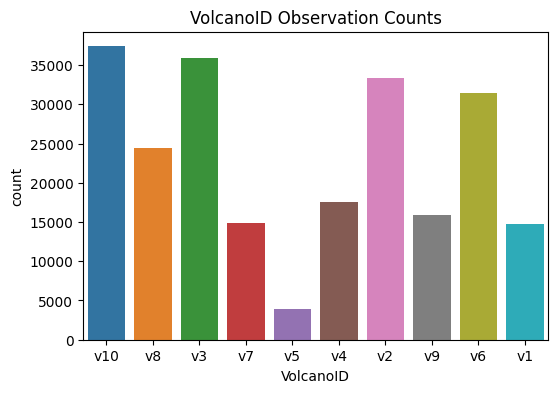

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='VolcanoID', data=cleaned_df)
plt.title("VolcanoID Observation Counts")
plt.show()


In [ ]:

#sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(12, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Create boxplots for each column
cols = getReadingslabels()
print(cols)
for i, column in enumerate(cols):
    sns.boxplot(x=cleaned_df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
import plotly.subplots as ps
col = df.select_dtypes(include=[float, int]).columns

fig = px.box(cleaned_df['Reading-50'], title="Boxplot of All Columns", labels={"variable": "Columns", "value": "Values"})

# Show the plot
fig.show()

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots

import plotly.graph_objects as go

column_names = cleaned_df.select_dtypes(include=[float, int]).columns

fig = make_subplots(rows=14, cols=5, subplot_titles=column_names)

# print(len(column_names))
# for i, column in enumerate(column_names):
#     row = (i // 5) + 1
#     col = (i % 5) + 1

#     fig.add_trace(
#         go.Histogram(x=cleaned_df[column], name=column),
#         row=row, col=col
#     )
# fig.update_layout(height=2000, width=1500, title_text="Histogram Subplots")
# fig.show()

for column in column_names:
    fig = px.histogram(df, x=column, title=f'Histogram of {column}')
    fig.show()


Deleted the Histograms as the size limit of the ipyb file exceeds 10 MB

<ipython-input-63-15b969d2dbbd>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Figure size 1500x1200 with 0 Axes>

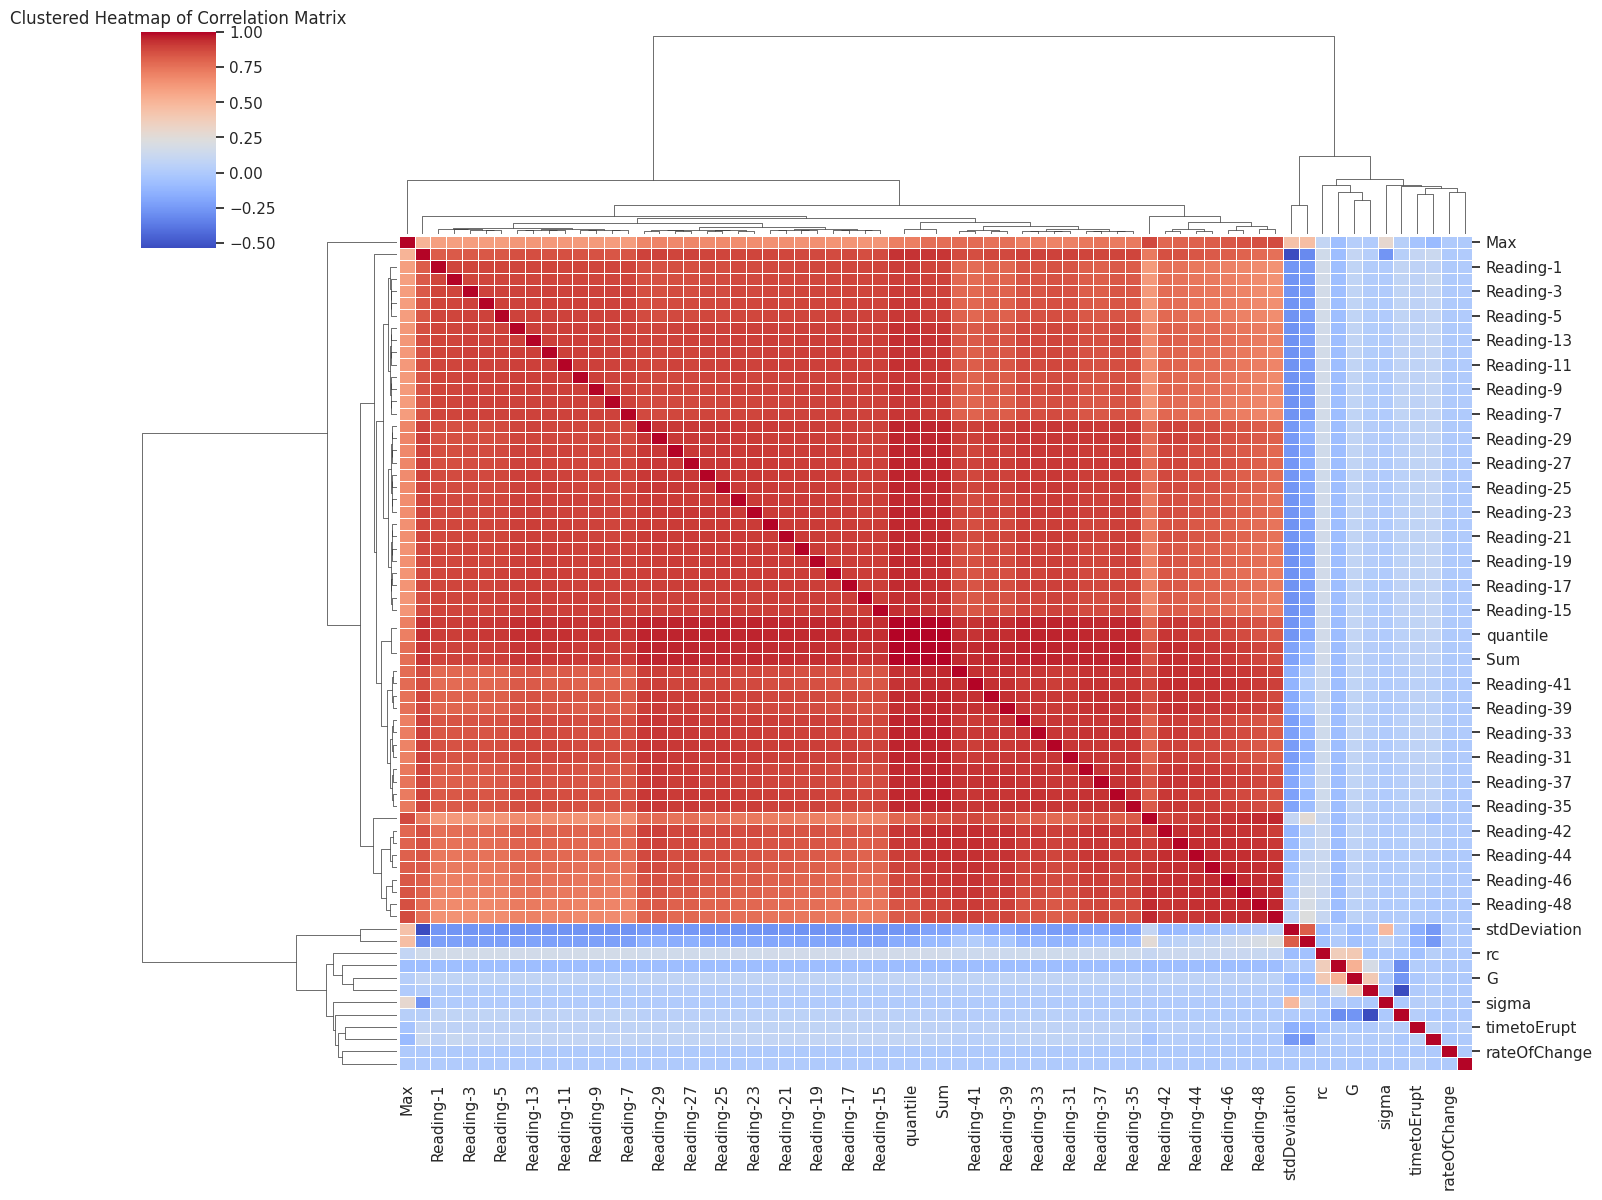

In [ ]:

# Calculate the correlation matrix
correlation_matrix = cleaned_df.corr()

# Set up Seaborn and Matplotlib

sns.set(style="whitegrid")

# Create a clustered heatmap
plt.figure(figsize=(15, 12))
sns.clustermap(correlation_matrix, cmap="coolwarm", linewidths=.5, figsize=(15, 12))

# Show the plot
plt.title('Clustered Heatmap of Correlation Matrix')
plt.show()

# 5. Model Training - TiltErupt Magnitude

 Using PyCaret for Choosing the best Regression Model and tunin Hypgerparameters.

1. Apply PCA
2. Apply Box-Cox transformation for target
3. Using GroupKfold to split the train and test data based on the Volcano ID.


In [ ]:
from pycaret.regression import *
from sklearn.model_selection import GroupKFold
from sklearn.decomposition import PCA
from scipy.stats import boxcox


dcols = cleaned_df.columns.tolist()
dcols.remove('Reading-50')
dcols.remove('obsID')
dcols.remove('VolcanoID')

X = cleaned_df[dcols]
y = cleaned_df['Reading-50'] #target variable

groups = cleaned_df['VolcanoID']


X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
groups = groups.reset_index(drop=True)

print(X.shape)
print(y.shape)
print(groups.shape)

#split into groubs based on the VolcanoID
num_folds = 2
group_kfold = GroupKFold(n_splits=num_folds)

# setup the experiment
experiment_name = 'Predict tilt_erupt_magnitude'
experiment = setup(data=X,
                   target=y,
                   fold_strategy='groupkfold',
                   fold=2,
                   fold_groups= groups,
                   experiment_name= experiment_name,
                   use_gpu=True,
                   feature_selection=True,
                   pca=True,
                   transform_target = True,
                   normalize=True,
                   log_experiment=False
                  )
#compare_models()

models_to_compare = ['gbr', 'rf', 'xgboost']

best_model = compare_models(include=models_to_compare)


(229397, 67)
(229397,)
(229397,)
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total B

,Description,Value
0,Session id,1168
1,Target,Reading-50
2,Target type,Regression
3,Original data shape,"(229397, 68)"
4,Transformed data shape,"(229397, 14)"
5,Transformed train set shape,"(160577, 14)"
6,Transformed test set shape,"(68820, 14)"
7,Numeric features,67
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0003,0.0000,0.0008,0.9392,0.0007,0.0024,43.6750
rf,Random Forest Regressor,0.0003,0.0000,0.0009,0.9212,0.0008,0.0024,35.6500
xgboost,Extreme Gradient Boosting,0.0003,0.0000,0.0009,0.9140,0.0008,0.0027,2.7800


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

Result--> Gradient Boosting Regressor performs better than the other models.

In [ ]:
#plot_model(best_model, plot = 'residuals')
# plot_model(best_model, plot = 'learning')
# plot_model(best_model, plot = 'error')
# plot_model(best_model, plot = 'feature')



,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,squared_error
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0


In [ ]:
models = create_model('gbr')
# # evaluate the models
#evaluate_model(models)
# # tune the models

#Custom grid to limit the search space for Hyperparameters
rf_param_grid = {
    'n_estimators': [2],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    'bootstrap': [True, False]
}

gbr_param_grid = {
    'n_estimators': [2],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
}
tuned_models,tuner = tune_model(models,custom_grid=gbr_param_grid, return_tuner=True,optimize='R2',n_iter=2 ,verbose=True,fold=2   )



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0003,0.0000,0.0007,0.9552,0.0006,0.0025
1,0.0003,0.0000,0.0008,0.9232,0.0007,0.0023
Mean,0.0003,0.0000,0.0008,0.9392,0.0007,0.0024
Std,0.0000,0.0000,0.0000,0.0160,0.0000,0.0001


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0009,0.0000,0.0029,0.2834,0.0026,0.0078
1,0.0008,0.0000,0.0024,0.2858,0.0021,0.0063
Mean,0.0009,0.0000,0.0026,0.2846,0.0024,0.0070
Std,0.0001,0.0000,0.0002,0.0012,0.0002,0.0007


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 2 folds for each of 2 candidates, totalling 4 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

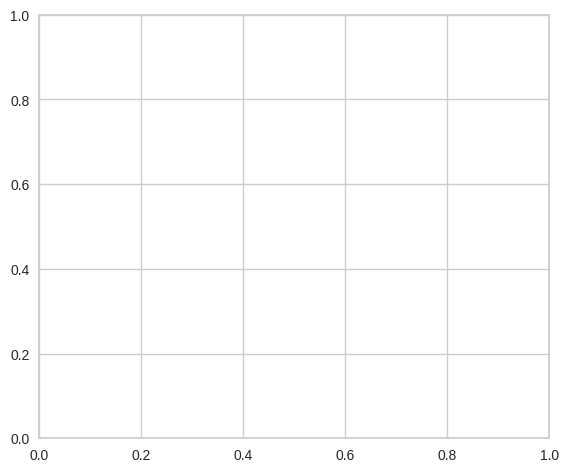

In [ ]:
evaluate_model(models)

Hyperparameters - After tuning the GradientBoosting Regression model

In [ ]:
tuned_models.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1168,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Predict values based on holdout test data

In [ ]:
holdout_pred = predict_model(models)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0002,0.0000,0.0003,0.9896,0.0003,0.0015


Test the model on the holdout Data.

In [ ]:
holdout_pred.head()

new_data = cleaned_df.copy()
new_data.drop('Reading-50', axis=1, inplace=True)
new_data.reset_index(drop=True, inplace=True)
predictions = predict_model(best_model, data = new_data)
predictions.head()

,VolcanoID,obsID,G,rho,mu,rc,M,sigma,timetoErupt,Reading-1,...,Max,Min,rateOfChange,stdDeviation,var,quantile,peaks,Sum,Eruption_Y,prediction_label
0,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,0.704208,0.958561,...,0.111353,0.965818,0.123087,0.000204,2.421141e-07,0.455955,0.681818,0.363627,0,0.126944
1,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,0.703589,0.957718,...,0.111353,0.965818,0.123078,0.000204,2.421233e-07,0.455955,0.727273,0.363627,0,0.126529
2,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,0.702970,0.962508,...,0.111353,0.965818,0.123079,0.000204,2.427181e-07,0.455981,0.681818,0.363659,0,0.126936
3,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,0.702352,0.962204,...,0.111347,0.965818,0.123065,0.000176,2.039135e-07,0.455981,0.727273,0.363641,0,0.126756
4,v10,o1,0.095604,0.857143,0.0,0.705882,0.016409,0.0,0.701733,0.960542,...,0.111347,0.965818,0.123088,0.000155,1.770491e-07,0.455955,0.727273,0.363612,0,0.126539


# 6. Model Training -  Time to Erupt


In [ ]:
cleaned_df

In [ ]:
# TimeUnits

from pycaret.regression import *
from sklearn.model_selection import GroupKFold

dcols = cleaned_df.columns.tolist()
dcols.remove('timetoErupt')
dcols.remove('obsID')
dcols.remove('VolcanoID')

X_1 = cleaned_df[dcols]
print(X_1.head())

y_1 = cleaned_df['timetoErupt'] #make the timetoErupt column as the target variable
print(f'y---->{y_1.head()}')

groups_1 = cleaned_df['VolcanoID']
print(f'groups--{groups_1}')


X_1 = X_1.reset_index(drop=True)
y_1 = y_1.reset_index(drop=True)
groups_1 = groups_1.reset_index(drop=True)


#split into groubs based on the VolcanoID
num_folds_1 = 2
group_kfold_1 = GroupKFold(n_splits=num_folds_1)

# setup the experiment
experiment_name_1 = 'Predict time to erupt'

experiment_1 = setup(data=X_1,
                   target=y_1,
                   fold_strategy='groupkfold',
                   fold=2,
                   fold_groups= groups_1,
                   experiment_name= experiment_name_1,
                   use_gpu=True,
                   feature_selection=True,
                   pca=True,
                   transform_target = True,
                   normalize=True,
                   #log_experiment=True
                  )

models_to_compare_1 = ['gbr', 'rf', 'ada']
best_model_1 = compare_models(include=models_to_compare_1)

#plot_model(best_model, plot = 'residuals')
#plot_model(best_model, plot = 'error')

          G       rho   mu        rc         M  sigma  Reading-1  Reading-2  Reading-3  Reading-4  Reading-5  Reading-6  Reading-7  Reading-8  Reading-9  Reading-10  Reading-11  Reading-12  Reading-13  Reading-14  Reading-15  Reading-16  Reading-17  Reading-18  Reading-19  Reading-20  Reading-21  Reading-22  Reading-23  Reading-24  Reading-25  Reading-26  Reading-27  Reading-28  Reading-29  Reading-30  Reading-31  Reading-32  Reading-33  Reading-34  Reading-35  Reading-36  Reading-37  Reading-38  Reading-39  Reading-40  Reading-41  Reading-42  Reading-43  Reading-44  Reading-45  Reading-46  Reading-47  Reading-48  Reading-49  Reading-50      Mean    Median       Max       Min  rateOfChange  stdDeviation           var  quantile     peaks       Sum  Eruption_Y
0  0.095604  0.857143  0.0  0.705882  0.016409    0.0   0.958561   0.954206   0.958979   0.958675   0.957020   0.952950   0.913713   0.894187   0.867933    0.835607    0.808426    0.783914    0.753087    0.725928    0.703281    0.6

,Description,Value
0,Session id,2541
1,Target,timetoErupt
2,Target type,Regression
3,Original data shape,"(229397, 68)"
4,Transformed data shape,"(229397, 14)"
5,Transformed train set shape,"(160577, 14)"
6,Transformed test set shape,"(68820, 14)"
7,Numeric features,67
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,0.1906,0.0529,0.2298,-0.0054,0.1666,1.9539,5.8050
gbr,Gradient Boosting Regressor,0.2016,0.0600,0.2448,-0.1417,0.1775,1.9617,44.7800
rf,Random Forest Regressor,0.2007,0.0631,0.2512,-0.2019,0.1799,1.7760,37.3200


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

In [ ]:
model_1 = create_model('rf')
evaluate_model(model_1)
tuned_models_1,tuner_1 = tune_model(model_1, return_tuner=True,optimize='R2')
interpret_model(model_1, plot = 'summary')


# 7. **Summary**

# TiltErupt Magnitude

1. Resgression Model :
Using Pycaret, With CrossValidation on full data , session timees out when finding the best model.
Running the model with Smaller subset data, GradientBoostingRegressor has good R2 value , hence it was choosen as the best Model .

2. Hyperparameter Search  
Inorder to reduce the time to search for the best Hyperparameters, the search spacewill be reduced by using custom parameter grid.Results are shared above. But wilh full data and CV, the sesion still times out.

3. The model performs well on the holdout data as depicted.

4. Model can be improved with ensemble models , but due to timeout constraints,couldnt perform with full dataset.

# TimeToErupt
Model Tranining returns low R2 value with PyCaret.
Based on the output, best model is chosen as AdaBoost Regressor.
Due to timeout constraints , multiple iterations to fix the data and find the best model was unsuccesful.



# Test Code - Please Ignore this section
 Used for experiments

In [ ]:
#@title TSfresh library

from matplotlib.backend_bases import colors
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.feature_extraction import ComprehensiveFCParameters

from tsfresh.utilities.distribution import MultiprocessingDistributor

from tsfresh import extract_relevant_features



cols = getReadingslabels()
cols.append("VolcanoID")

settings = ComprehensiveFCParameters()


Distributor = MultiprocessingDistributor(n_workers=4,
                                         disable_progressbar=False,
                                         progressbar_title="Feature Extraction")

#df_t = pd.DataFrame([df.iloc[0][13:64]])

X = extract_features(df[cols], column_id="VolcanoID", distributor=Distributor,default_fc_parameters=settings)

y = df['Eruption']
#features_filtered_direct = extract_relevant_features(df['VolcanoID'], df[ycols] ,column_id="VolcanoID")


from tsfresh import select_features

X_filtered = select_features(X, y)

#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=df['VolcanoID'], random_state=42)


#X_filtered_train, X_filtered_test = X_train[features.columns], X_test[features.columns]



In [ ]:
#@title prophet

In [ ]:
#@title tsfresh test

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.examples import robot_execution_failures
from tsfresh.feature_extraction import ComprehensiveFCParameters
robot_execution_failures.download_robot_execution_failures()
df, y = robot_execution_failures.load_robot_execution_failures()
df.shape
df['id'].value_counts()

extraction_settings = ComprehensiveFCParameters()

X = extract_features(df, column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     # we impute = remove all NaN features automatically
                     impute_function=impute)
